## Intro

We will be performing EDA on the jigsaw unintended bias dataset.

The data consists of 2 million comments from Civil Comments, which has since been taken down: **['read more about Civil Comments here'](https://medium.com/@aja_15265/saying-goodbye-to-civil-comments-41859d3a2b1d)**

Background on the dataset can be found here: **['kaggle toxicity classification data'](https://www.kaggle.com/c/jigsaw-unintended-bias-in-toxicity-classification/data)**

Some notible takeaeays from the competitions dataset:

- For evaluation, test set examples with target >= 0.5 will be considered to be in the positive class (toxic).

### Labelling Schema

To obtain the toxicity labels, each comment was shown to up to 10 annotators. Annotators were asked to: 'Rate the toxicity of this comment'

- Very Toxic (a very hateful, aggressive, or disrespectful comment that is very likely to make you leave a discussion or give up on sharing your perspective)
- Toxic (a rude, disrespectful, or unreasonable comment that is somewhat likely to make you leave a discussion or give up on sharing your perspective)
- Hard to Say
- Not Toxic

These ratings were then aggregated with the target value representing the fraction of annotations that annotations fell within the former two categories.

### Annotators

Toxicity and identity labeling was done in 2018 on the Figure Eight crowd rating platform, which has since been purchased by Appen. Annotators came from all over the world, and all were proficient in English.

Raters were compensated 1.5 cents per judgment, a rate that was set based on two factors: what rates were competitive on the platform and targeting an hourly wage appropriate for raters' locales.

Figure Eight offers raters the option to select from multiple tasks with different pay, so rates need to be competitive to attract enough raters. At a rate of 1.5 cents per judgment, enough raters participated to complete this annotation in a few weeks. Following task completion, raters were given a satisfaction survey where the average score for "Pay" was 3.8 out of 5, which aligned with Figure Eight's recommendation to target pay to a satisfaction score greater than 3.5.

Hourly rates for workers depend on how fast judgements were completed. Most raters will have earned between 0.90/hour (at one comment per minute) to 5.40/hour (at 6 comments per minute), which aligns with typical hourly pay in the geographic regions where most raters are located.

Since this dataset was annotated in 2018, more tools have become available to help set rates. Consequently, typical pay for data annotation is increasing globally.globally. Toxic

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [14]:
df = pd.read_csv('../data/kaggle_bias/all_data.csv')

In [7]:
df

,id,comment_text,split,created_date,publication_id,parent_id,article_id,rating,funny,wow,...,white,asian,latino,other_race_or_ethnicity,physical_disability,intellectual_or_learning_disability,psychiatric_or_mental_illness,other_disability,identity_annotator_count,toxicity_annotator_count
0,1083994,He got his money... now he lies in wait till a...,train,2017-03-06 15:21:53.675241+00,21,NaN,317120,approved,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,67
1,650904,Mad dog will surely put the liberals in mental...,train,2016-12-02 16:44:21.329535+00,21,NaN,154086,approved,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,76
2,5902188,And Trump continues his lifelong cowardice by ...,train,2017-09-05 19:05:32.341360+00,55,NaN,374342,approved,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,63
3,7084460,"""while arresting a man for resisting arrest"".\...",test,2016-11-01 16:53:33.561631+00,13,NaN,149218,approved,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,76
4,5410943,Tucker and Paul are both total bad ass mofo's.,train,2017-06-14 05:08:21.997315+00,21,NaN,344096,approved,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1999511,1018736,Another man shamming article. If white men did...,train,2017-02-20 07:20:49.964620+00,54,NaN,169202,approved,0,0,...,0.8,0.0,0.0,0.0,0.000000,0.0,0.0,0.00000,10,10
1999512,340016,"""no matter what is put in front of you regardi...",train,2016-06-06 06:43:04.780968+00,21,339965.0,137961,approved,0,0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.00000,10,10
1999513,919629,The Democrat party aided and abetted by it's M...,train,2017-01-30 02:44:29.168863+00,54,NaN,164845,rejected,0,1,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.00000,11,10
1999514,5165492,I just don't find her a very good representati...,train,2017-04-22 18:42:02.442987+00,54,NaN,328877,approved,1,0,...,0.0,0.0,0.0,0.0,0.003717,0.0,0.0,0.00000,269,10


In [8]:
df[['comment_text', 'toxicity']]

,comment_text,toxicity
0,He got his money... now he lies in wait till a...,0.373134
1,Mad dog will surely put the liberals in mental...,0.605263
2,And Trump continues his lifelong cowardice by ...,0.666667
3,"""while arresting a man for resisting arrest"".\...",0.815789
4,Tucker and Paul are both total bad ass mofo's.,0.550000
...,...,...
1999511,Another man shamming article. If white men did...,0.400000
1999512,"""no matter what is put in front of you regardi...",0.400000
1999513,The Democrat party aided and abetted by it's M...,0.400000
1999514,I just don't find her a very good representati...,0.400000


Our average comment length:

In [19]:
df['comment_text'].str.len().mean()

297.2538514397513

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999516 entries, 0 to 1999515
Data columns (total 46 columns):
 #   Column                               Dtype  
---  ------                               -----  
 0   id                                   int64  
 1   comment_text                         object 
 2   split                                object 
 3   created_date                         object 
 4   publication_id                       int64  
 5   parent_id                            float64
 6   article_id                           int64  
 7   rating                               object 
 8   funny                                int64  
 9   wow                                  int64  
 10  sad                                  int64  
 11  likes                                int64  
 12  disagree                             int64  
 13  toxicity                             float64
 14  severe_toxicity                      float64
 15  obscene                         

In [6]:
df.isnull().sum()

id                                           0
comment_text                                 4
split                                        0
created_date                                 0
publication_id                               0
parent_id                               864807
article_id                                   0
rating                                       0
funny                                        0
wow                                          0
sad                                          0
likes                                        0
disagree                                     0
toxicity                                     0
severe_toxicity                              0
obscene                                      0
sexual_explicit                              0
identity_attack                              0
insult                                       0
threat                                       0
male                                   1551516
female       

### Understanding our initial metrics and targets

In [57]:
metric_cols = ['funny', 'wow', 'sad', 'likes', 'disagree']
toxic_cols = ['toxicity', 'severe_toxicity', 'obscene', 'sexual_explicit', 'identity_attack', 'insult', 'threat']

In [68]:
df[metric_cols]

,funny,wow,sad,likes,disagree
0,0,0,0,2,0
1,0,0,1,2,0
2,1,0,2,3,7
3,0,0,0,0,0
4,0,0,0,1,0
...,...,...,...,...,...
1999511,0,0,0,2,0
1999512,0,0,0,1,0
1999513,0,1,0,3,2
1999514,1,0,0,3,0


Metric columns seem to be user interactions with our comment, such as reactions.

Will this inform any aspect of our modelling?

In [69]:
df[toxic_cols]

,toxicity,severe_toxicity,obscene,sexual_explicit,identity_attack,insult,threat
0,0.373134,0.044776,0.089552,0.014925,0.000000,0.343284,0.014925
1,0.605263,0.013158,0.065789,0.013158,0.092105,0.565789,0.065789
2,0.666667,0.015873,0.031746,0.000000,0.047619,0.666667,0.000000
3,0.815789,0.065789,0.552632,0.592105,0.000000,0.684211,0.105263
4,0.550000,0.037500,0.337500,0.275000,0.037500,0.487500,0.000000
...,...,...,...,...,...,...,...
1999511,0.400000,0.000000,0.000000,0.000000,0.200000,0.300000,0.000000
1999512,0.400000,0.000000,0.000000,0.000000,0.400000,0.000000,0.000000
1999513,0.400000,0.000000,0.200000,0.100000,0.300000,0.300000,0.000000
1999514,0.400000,0.000000,0.000000,0.000000,0.200000,0.100000,0.000000


Our toxic columns are the main targets for our modelling. We want to identify toxicity, with the option for targeting specific brands of toxicity.
                                                                                                       
As it stands our toxicity values are floats

Do we want to maintain floats to show magnitude

Or begin with binaries for simplification

Let's get a sense of distribution within the metric and toxicity columns

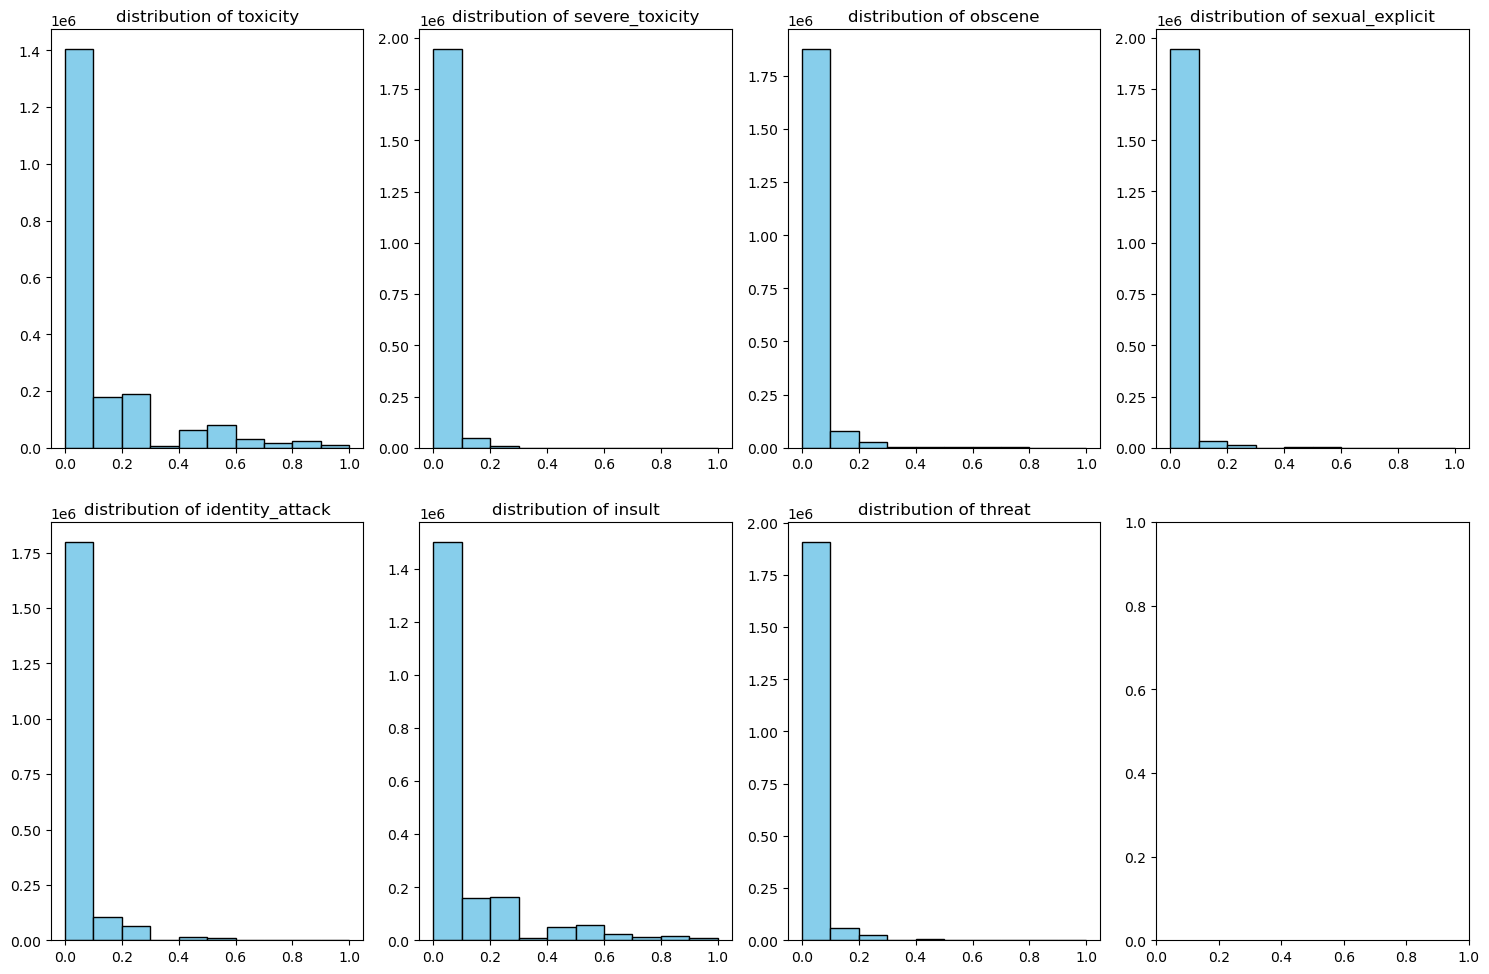

In [85]:
plot_num = 1

plt.subplots(2,4, figsize=(15,10))

for col in toxic_cols:
    plt.subplot(2,4,plot_num)
    plt.hist(df[col], color='skyblue', edgecolor='black')
    plt.title(f'distribution of {col}')
    plot_num +=1

plt.tight_layout()
plt.show()

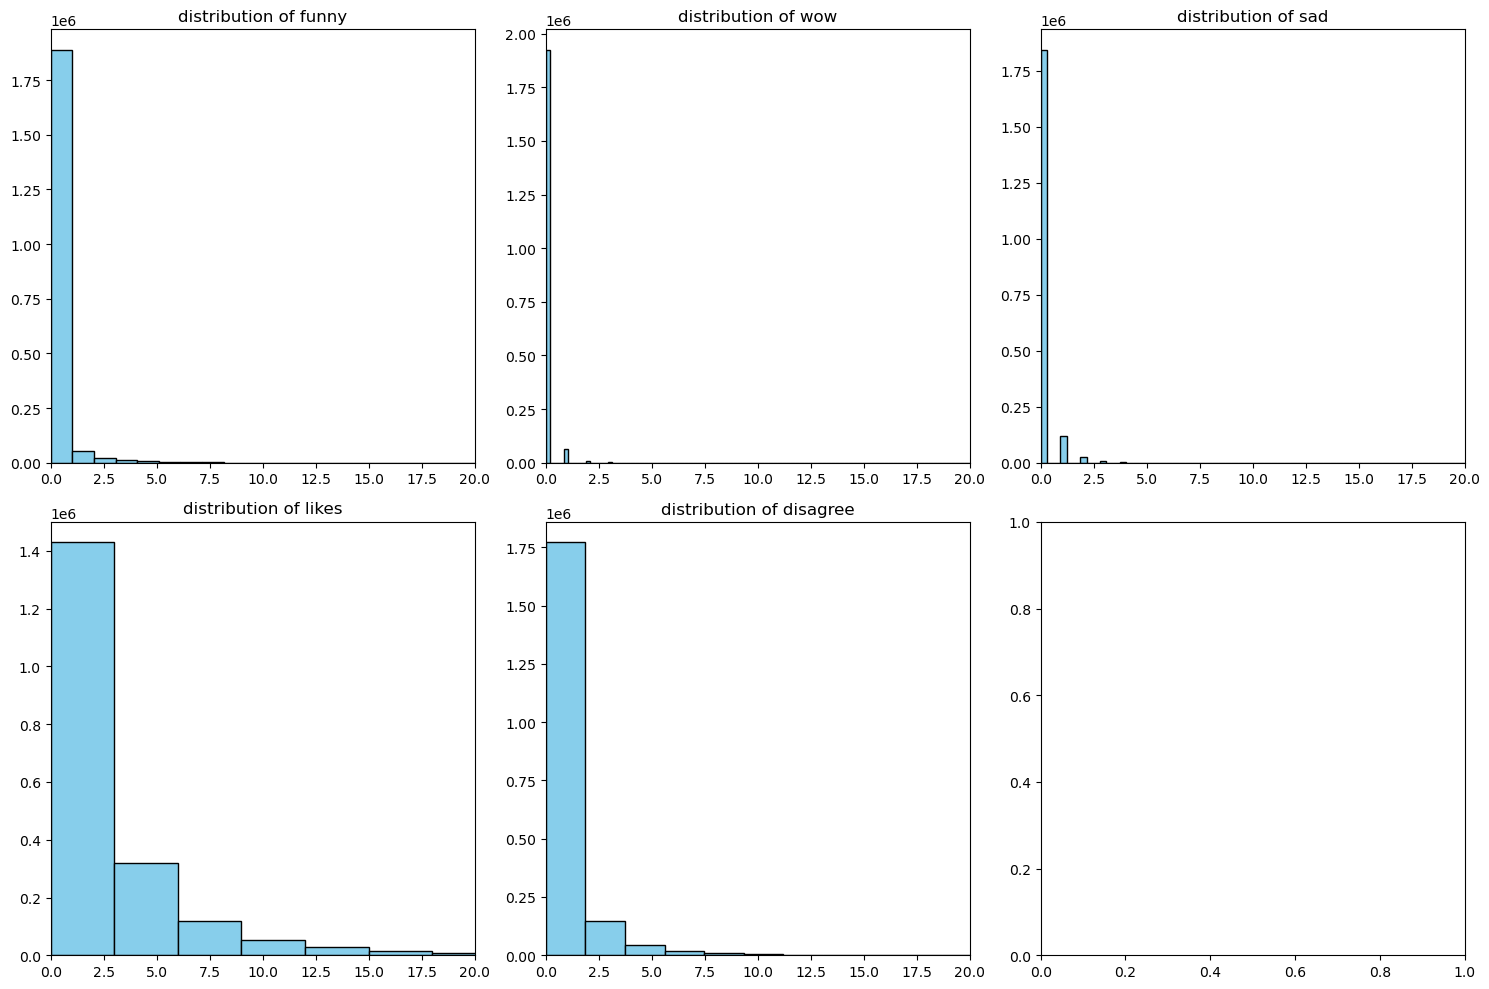

In [94]:
plot_num = 1

plt.subplots(2,3, figsize=(15,10))

for col in metric_cols:
    plt.subplot(2,3,plot_num)
    plt.hist(df[col], bins=100, color='skyblue', edgecolor='black')
    plt.title(f'distribution of {col}')
    plt.xlim(0,20)
    plot_num +=1

plt.tight_layout()
plt.show()

### Understanding tags for stretch goals

Many null values, can these be set to 0?

In [24]:
df[['comment_text','female']]

,comment_text,female
0,He got his money... now he lies in wait till a...,NaN
1,Mad dog will surely put the liberals in mental...,NaN
2,And Trump continues his lifelong cowardice by ...,NaN
3,"""while arresting a man for resisting arrest"".\...",NaN
4,Tucker and Paul are both total bad ass mofo's.,NaN
...,...,...
1999511,Another man shamming article. If white men did...,0.000000
1999512,"""no matter what is put in front of you regardi...",0.000000
1999513,The Democrat party aided and abetted by it's M...,0.363636
1999514,I just don't find her a very good representati...,0.141264


In [27]:
df.iloc[1999511][['comment_text', 'female']]

comment_text    Another man shamming article. If white men did...
female                                                        0.0
Name: 1999511, dtype: object

In [33]:
df.iloc[1999511][['comment_text', 'male']]

comment_text    Another man shamming article. If white men did...
male                                                          0.7
Name: 1999511, dtype: object

In [49]:
df.iloc[1999511]['comment_text']

'Another man shamming article. If white men did do the work there would be no Canada today.\n\n*\n\n\n\n\n\n\n\n\nhttps://www.youtube.com/watch?v=4ZiBKdjJKgk'

In [30]:
df.iloc[1999513][['comment_text', 'male']]

comment_text    The Democrat party aided and abetted by it's M...
male                                                          0.0
Name: 1999513, dtype: object

In [31]:
df.iloc[1999514]['comment_text']

"I just don't find her a very good representation of the transexual community. She just seems so self-absorbed & concerned with such superficial issues."

In [36]:
df.iloc[3]['comment_text']

"He got his money... now he lies in wait till after the election in 2 yrs.... dirty politicians need to be afraid of Tar and feathers again... but they aren't and so the people get screwed."

In [37]:
df.iloc[3]['male']

nan

In [40]:
df.iloc[3].isnull().sum()

25

In [41]:
df.iloc[1999513].isnull().sum()

1

In [46]:
df.iloc[1999513]['parent_id']

nan

In [48]:
df.iloc[4][['comment_text']]

comment_text    Tucker and Paul are both total bad ass mofo's.
Name: 4, dtype: object

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999516 entries, 0 to 1999515
Data columns (total 46 columns):
 #   Column                               Dtype  
---  ------                               -----  
 0   id                                   int64  
 1   comment_text                         object 
 2   split                                object 
 3   created_date                         object 
 4   publication_id                       int64  
 5   parent_id                            float64
 6   article_id                           int64  
 7   rating                               object 
 8   funny                                int64  
 9   wow                                  int64  
 10  sad                                  int64  
 11  likes                                int64  
 12  disagree                             int64  
 13  toxicity                             float64
 14  severe_toxicity                      float64
 15  obscene                         

In [12]:
df[['id', 'comment_text', 'toxicity']].head()

,id,comment_text,toxicity
0,1083994,He got his money... now he lies in wait till a...,0.373134
1,650904,Mad dog will surely put the liberals in mental...,0.605263
2,5902188,And Trump continues his lifelong cowardice by ...,0.666667
3,7084460,"""while arresting a man for resisting arrest"".\...",0.815789
4,5410943,Tucker and Paul are both total bad ass mofo's.,0.550000


In [8]:
df[['comment_text', 'toxicity']].nunique()

comment_text    1971914
toxicity           3063
dtype: int64

In [11]:
df['comment_text'].loc[3]

'"while arresting a man for resisting arrest".\n\nIf you cop-suckers can\'t see a problem with this, then go suck the barrel of a Glock.'

In [13]:
df[['id', 'comment_text', 'toxicity', 'toxicity_annotator_count']].head()

,id,comment_text,toxicity,toxicity_annotator_count
0,1083994,He got his money... now he lies in wait till a...,0.373134,67
1,650904,Mad dog will surely put the liberals in mental...,0.605263,76
2,5902188,And Trump continues his lifelong cowardice by ...,0.666667,63
3,7084460,"""while arresting a man for resisting arrest"".\...",0.815789,76
4,5410943,Tucker and Paul are both total bad ass mofo's.,0.550000,80


In [15]:
df['toxicity_annotator_count'].mean()

8.77571972417325

In [17]:
df['toxicity_annotator_count'].median()

4.0

In [5]:
test = pd.read_csv('../data/kaggle_bias/test_public_expanded.csv')

In [12]:
test[['comment_text', 'toxicity', 'toxicity_annotator_count']].head()

,comment_text,toxicity,toxicity_annotator_count
0,Jeff Sessions is another one of Trump's Orwell...,0.200000,5
1,I actually inspected the infrastructure on Gra...,0.000000,4
2,No it won't . That's just wishful thinking on ...,0.000000,4
3,Instead of wringing our hands and nibbling the...,0.000000,4
4,how many of you commenters have garbage piled ...,0.753846,65


In [16]:
test['toxicity_annotator_count'].mean()

8.648530620632963

In [18]:
test['toxicity_annotator_count'].median()

4.0